In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Load Data

In [21]:
imdb = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/Big Data/new_github/big_data_ai/imdp.csv',encoding='latin-1')

In [22]:
imdb.keys()

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [23]:
imdb.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [24]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [25]:
imdb.describe().round(1)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.0,5028.0,4939.0,5020.0,5036.0,4159.0,5043.0,5043.0,5030.0,5022.0,4.551000e+03,4935.0,5030.0,5043.0,4714.0,5043.0
mean,140.2,107.2,686.5,645.0,6560.0,48468407.5,83668.2,9699.1,1.4,272.8,3.975262e+07,2002.5,1651.8,6.4,2.2,7526.0
std,121.6,25.2,2813.3,1665.0,15020.8,68452990.4,138485.3,18163.8,2.0,378.0,2.061149e+08,12.5,4042.4,1.1,1.4,19320.4
min,1.0,7.0,0.0,0.0,0.0,162.0,5.0,0.0,0.0,1.0,2.180000e+02,1916.0,0.0,1.6,1.2,0.0
25%,50.0,93.0,7.0,133.0,614.0,5340987.5,8593.5,1411.0,0.0,65.0,6.000000e+06,1999.0,281.0,5.8,1.8,0.0
50%,110.0,103.0,49.0,371.5,988.0,25517500.0,34359.0,3090.0,1.0,156.0,2.000000e+07,2005.0,595.0,6.6,2.4,166.0
75%,195.0,118.0,194.5,636.0,11000.0,62309437.5,96309.0,13756.5,2.0,326.0,4.500000e+07,2011.0,918.0,7.2,2.4,3000.0
max,813.0,511.0,23000.0,23000.0,640000.0,760505847.0,1689764.0,656730.0,43.0,5060.0,1.221550e+10,2016.0,137000.0,9.5,16.0,349000.0


array([[<AxesSubplot: title={'center': 'num_critic_for_reviews'}>,
        <AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'director_facebook_likes'}>,
        <AxesSubplot: title={'center': 'actor_3_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'actor_1_facebook_likes'}>,
        <AxesSubplot: title={'center': 'gross'}>,
        <AxesSubplot: title={'center': 'num_voted_users'}>,
        <AxesSubplot: title={'center': 'cast_total_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'facenumber_in_poster'}>,
        <AxesSubplot: title={'center': 'num_user_for_reviews'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'title_year'}>],
       [<AxesSubplot: title={'center': 'actor_2_facebook_likes'}>,
        <AxesSubplot: title={'center': 'imdb_score'}>,
        <AxesSubplot: title={'center': 'aspect_ratio'}>,
        <AxesSubplot: title={'center': 'movie_facebook_likes'}>]],
      dtype=o

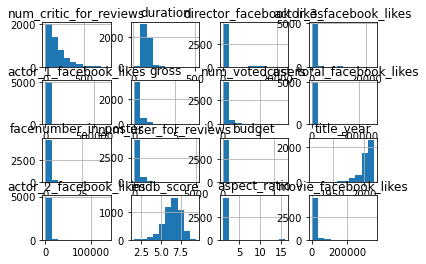

In [26]:
imdb.hist()

In [27]:
imdb.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [28]:
num_cols = imdb.select_dtypes(include=['float64', 'int64']).columns.tolist()
imdb_num_df = imdb[num_cols]
print(imdb_num_df.head())


   num_critic_for_reviews  duration  director_facebook_likes  \
0                   723.0     178.0                      0.0   
1                   302.0     169.0                    563.0   
2                   602.0     148.0                      0.0   
3                   813.0     164.0                  22000.0   
4                     NaN       NaN                    131.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   
2                   161.0                 11000.0  200074175.0   
3                 23000.0                 27000.0  448130642.0   
4                     NaN                   131.0          NaN   

   num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
0           886204                       4834                   0.0   
1           471220                      48350                   0.0   
2    

##### Preprocessing

In [29]:
imdb1 = imdb_num_df.copy()

In [30]:
# Skewed distribution (X) -->log(X) or sqrt(X) or power transform--> Normal distribution
# Feature scaling: scale of features to be in the same range (Minmaxscaler <Normalization> or Standardscaler <Standardlization>)
# A row of input [x1,x2,---,xn] to be a norm --> normalizer
normalizer=MinMaxScaler().fit(imdb1)
imdb1=pd.DataFrame(normalizer.transform(imdb1), columns=)

SyntaxError: invalid syntax (3903451737.py, line 5)